# Introduction
We'll be using a data set released by American Community Survey about job outcomes from college graduates between 2010 and 2012.

This is primarily a visualization project where we'll explore questions like:
* Do students in more popular majors make more money?
    * Using scatter plots
* How many majors are predominantly male? Predominantly female?
    * Using histograms
* Which category of majors have the most students?
    * Using bar plots

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# jupyter magic to display plots inline
%matplotlib inline

In [6]:
recent_grads = pd.read_csv('recent-grads.csv')

## Understanding the data

In [7]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [8]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [9]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [10]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


## Data Cleaning

Matplotlib expects columns of values to have the same lengths so we'll need to deal with missing values.

In [14]:
# get the number of rows
raw_data_count = recent_grads.shape[0]

In [17]:
recent_grads = recent_grads.dropna()

In [18]:
# get number of rows after dropping missing values
cleaned_data_count = recent_grads.shape[0]

In [21]:
print('# of rows before dropping missing values: {}'.format(raw_data_count))
print('# of rows after dropping missing values: {}'.format(cleaned_data_count))

# of rows before dropping missing values: 173
# of rows after dropping missing values: 172


Only one row was dropped.

## Scatter Plots

Can we make any insights on relationships between majors and money, gender distribution, or fulltime and salary?

Text(0.5, 1.0, 'Sample Size of Full Timers vs Median Salary of Full Timers')

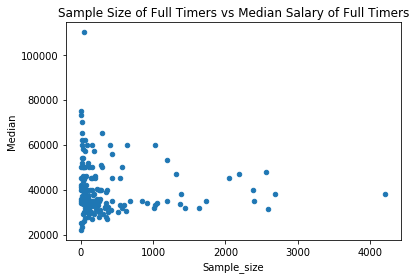

In [27]:
ax = recent_grads.plot(x = 'Sample_size', y = 'Median', kind = 'scatter')
ax.set_title('Sample Size of Full Timers vs Median Salary of Full Timers')

Text(0.5, 1.0, 'Sample Size of Full Timers vs Unemployement Rate')

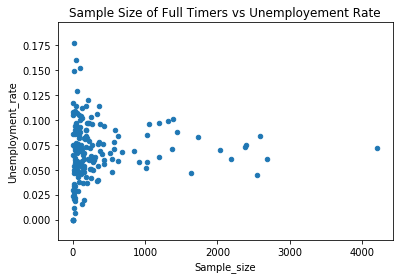

In [29]:
ax = recent_grads.plot(x = 'Sample_size', y = 'Unemployment_rate', kind = 'scatter')
ax.set_title('Sample Size of Full Timers vs Unemployement Rate')

Text(0.5, 1.0, '# of Full Timers vs Median Salary for Full Timers')

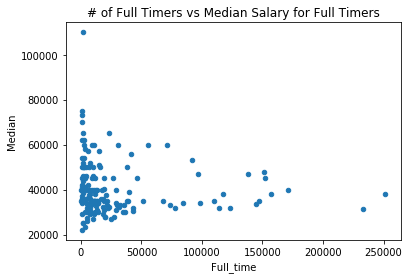

In [25]:
ax = recent_grads.plot(x = 'Full_time', y = 'Median', kind = 'scatter')
ax.set_title('# of Full Timers vs Median Salary for Full Timers')

Text(0.5, 1.0, 'Ratio of Women vs Unemployment Rate')

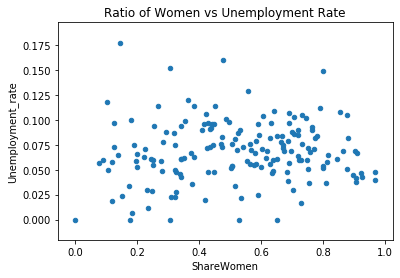

In [30]:
ax = recent_grads.plot(x = 'ShareWomen', y = 'Unemployment_rate', kind = 'scatter')
ax.set_title('Ratio of Women vs Unemployment Rate')

Text(0.5, 1.0, '# of Male Graduates vs Median Salary for Full Timers')

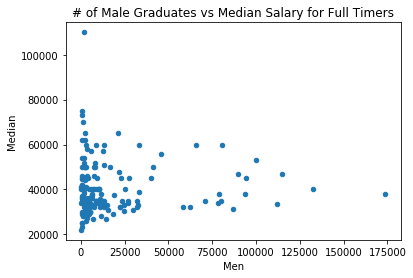

In [31]:
ax = recent_grads.plot(x = 'Men', y = 'Median', kind = 'scatter')
ax.set_title('# of Male Graduates vs Median Salary for Full Timers')

Text(0.5, 1.0, '# of Female Graduates vs Median Salary for Full Timers')

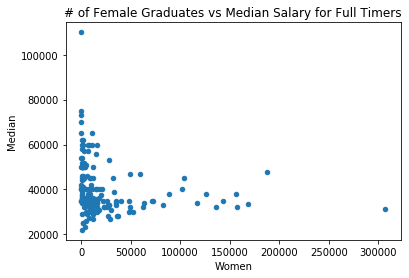

In [34]:
ax = recent_grads.plot(x = 'Women', y = 'Median', kind = 'scatter')
ax.set_title('# of Female Graduates vs Median Salary for Full Timers')

Doesn't seem that popular majors make more money. If I had to ballpark the most common salary range, it'd be around \\$35,000.

Also doesn't seem to be a relationship between unemployment rates and majors with any ratio of women.

There's a weak negative association between full timers and median salary. Majors with a high number of full time employees seem to hit a floor at around \\$35,000.

## Histograms

We'll use histograms to explore the following questions:
1. What percent of majors are predominantly male? Predominantly female?
2. What's the most common median salary range?

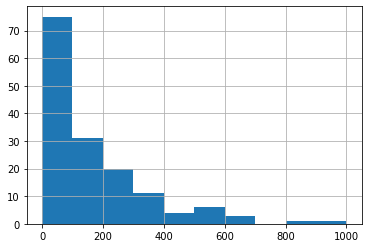

In [43]:
recent_grads['Sample_size'].hist(bins = 10, range = (0, 1000))

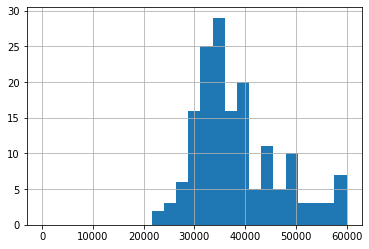

In [44]:
recent_grads['Median'].hist(bins = 25, range = (0, 60000))

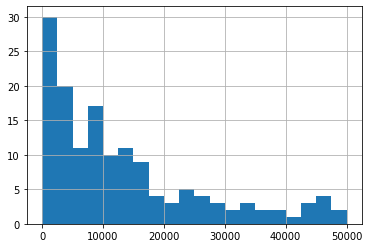

In [47]:
recent_grads['Employed'].hist(bins = 20, range = (0, 50000))

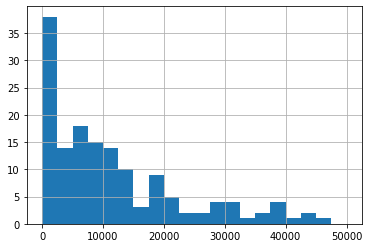

In [49]:
recent_grads['Full_time'].hist(bins = 20, range = (0, 50000))

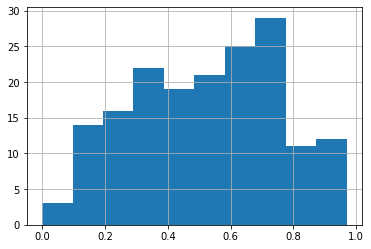

In [50]:
recent_grads['ShareWomen'].hist()

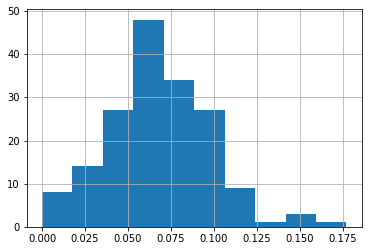

In [51]:
recent_grads['Unemployment_rate'].hist()

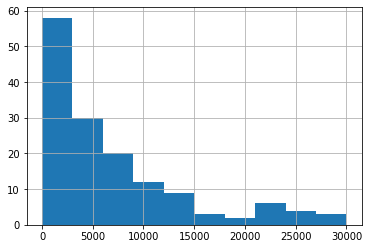

In [56]:
recent_grads['Men'].hist(range = (0, 30000))

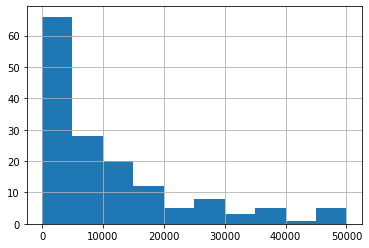

In [59]:
recent_grads['Women'].hist(range = (0, 50000))

The ranges for each histogram was set so we can get a better sense of the "meat" of the data.

The most common median salary range hits around the $35,000 range.

What's the definition of predominant? For the sake of this exercise, let's set ratio at 60% for a gender to be considered the majority. For males, this would mean we'd be looking at ShareWomen ratios of 0.4 and below. Looks like 54 out of 172 majors (or 31.39%) are predominantly male. For females, we'd be looking a ratios 0.6 and above. In this case, there's roughly 77 majors (or 44.77%) are predominantly female.

Interestingly, unemployment rates follow a close normal distribution with most majors falling at around 6% unemployment.

## Scatter Matrix Plots

Let's see if using Scatter Matrix plots sheds any additional insights on the same questions in the previous two sections.

In [60]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002196EC91198>,
      dtype=object)

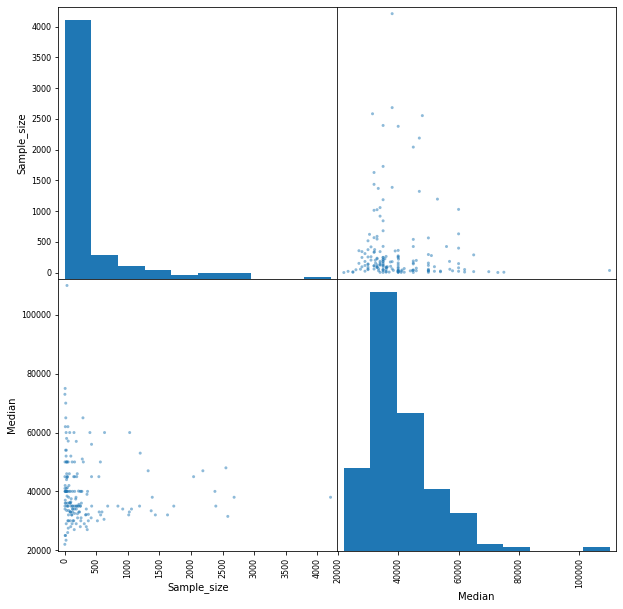

In [62]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize = (10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002196EE2FB38>,
      dtype=object)

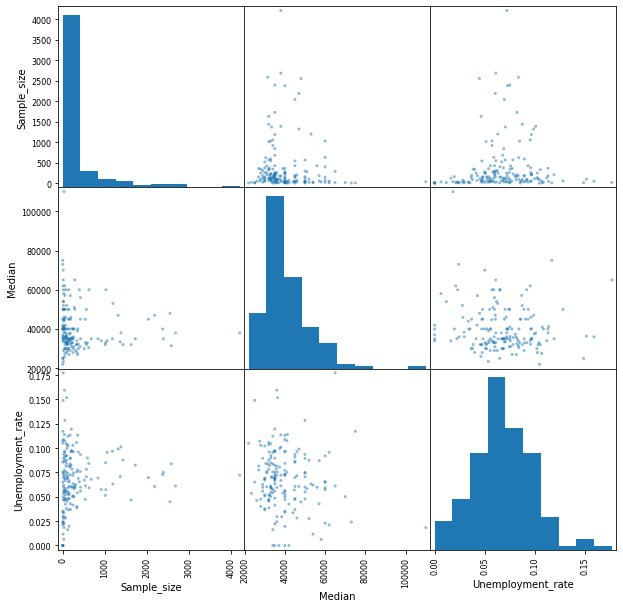

In [63]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize = (10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002196F72DB38>,
      dtype=object)

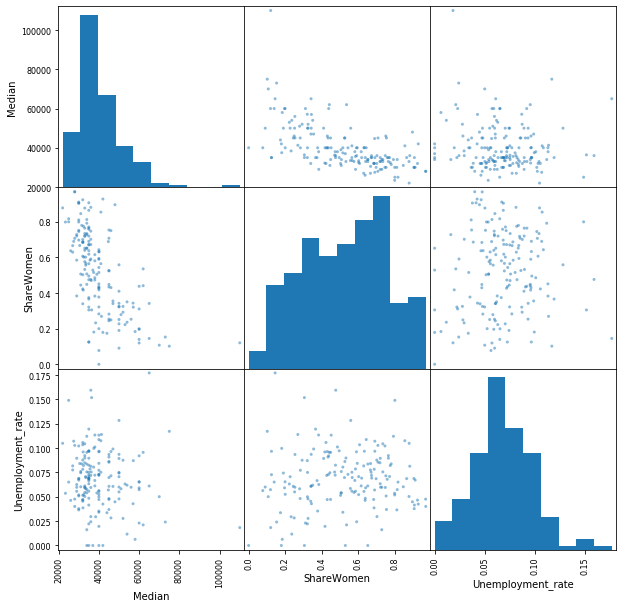

In [65]:
scatter_matrix(recent_grads[['Median', 'ShareWomen', 'Unemployment_rate']], figsize = (10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021970E3D3C8>,
      dtype=object)

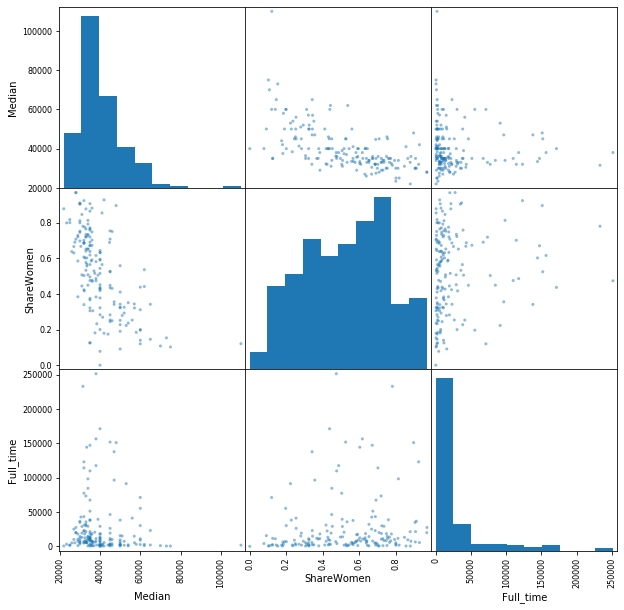

In [68]:
scatter_matrix(recent_grads[['Median', 'ShareWomen', 'Full_time']], figsize = (10, 10))

As the ratio of ShareWomen increases, the Median Salary seems to decrease. Regardless of the ShareWomen ratio, the distribution of Full_time looks even from 0 to 50,000.

Unemployment rates still has no discernable relationship regarding majors with varying male to female ratios. Though there seems to be a weak concentration between unemployment rates from 0.05 to 0.10 and median salaries from \\$30,000 to \\$40,000.

## Bar Plots

(0, 1)

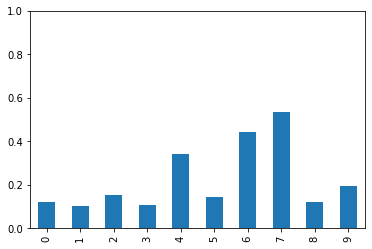

In [78]:
recent_grads.head(10)['ShareWomen'].plot(kind = 'bar')
plt.ylim(0, 1)

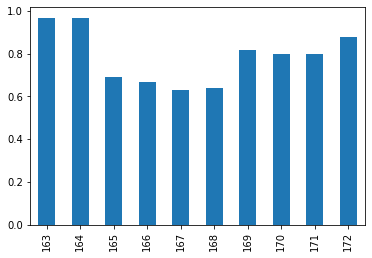

In [70]:
recent_grads.tail(10)['ShareWomen'].plot(kind = 'bar')

(0, 0.18)

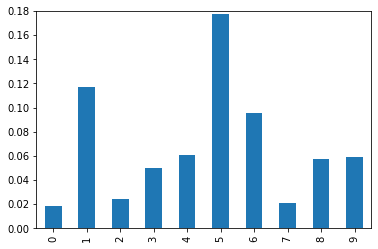

In [82]:
recent_grads.head(10)['Unemployment_rate'].plot(kind = 'bar')
plt.ylim(0, 0.18)

(0.0, 0.18)

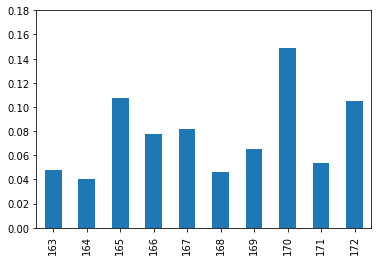

In [83]:
recent_grads.tail(10)['Unemployment_rate'].plot(kind = 'bar')
plt.ylim(0.00, 0.18)